#Abrindo o modelo e carregando  bibliotecas

In [ ]:
from google.colab import drive, files
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pickle
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab.data_table import DataTable
DataTable.max_columns = 120

Definindo o caminho para abrir o modelo do Light gbm 

In [ ]:
#Caminho para abrir o arquivo(utilizar o caminho local, visto que o arquivo é maior que 600MB. Assim, recomendo fazer o download do modelo e upar para seu drive pessoal)
DATA_PATH = "/content/drive/MyDrive/2022-2A-T05/Grupo 3/Colabs" 

#Abrindo o modelo LGBM
infile = open(DATA_PATH+"/predict_lgbm.pkl",'rb')

In [ ]:
#Modelo definido
model = pickle.load(infile)

#Input dos dados para a predição





Nessa seção você poderá inserir as variáveis utilizadas para podermos definir os valores de entrada para a simulação do nosso Modelo de Predição.

In [ ]:
from datetime import date
from datetime import datetime

Categoria = 'Categoria_FEMININO' #@param ["Categoria_AUDITORIO", "Categoria_CARROS E MOTORES", "Categoria_CULINARIO", "Categoria_DEBATE","Categoria_DOCUMENTARIO","Categoria_EDUCATIVO", "Categoria_ENTREVISTA", "Categoria_ESPORTE", "Categoria_FEMININO","Categoria_FILME", "Categoria_FUTEBOL","Categoria_GAME SHOW","Categoria_HUMORISTICO","Categoria_JORNALISMO", "Categoria_MINISSERIE", "Categoria_MUSICAL","Categoria_NOVELA", "Categoria_OUTROS", "Categoria_POLITICO", "Categoria_PREMIACAO","Categoria_REALITY SHOW","Categoria_RELIGIOSO", "Categoria_REPORTAGEM", "Categoria_RURAL", "Categoria_SERIES","Categoria_SHOW", "Categoria_SORTEIO", "Categoria_TELE VENDAS"]
Dia_da_semana = 'Sexta' #@param ['Segunda','Terça','Quarta','Quinta','Sexta','Sábado','Domingo']
Dia_do_Mês = "2022-10-02" #@param {type:"date"}
Hora_inicio = '12' #@param ['6', '7', '8', '9', '10', '11', '12', '13', '14', '15','16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29']
Minuto_inicio= '30' #@param ['00', '05', '10', '15','20','25', '30','35','40','45','50','55']
Hora_final = '26' #@param ['6', '7', '8', '9', '10', '11', '12', '13', '14', '15','16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29']
Minuto_final= '00' #@param ['00', '05', '10', '15','20','25', '30','35','40','45','50','55']

In [ ]:
#Definindo a hora inicio e o minuto inicial 
Hr_Inicio =float( Hora_inicio + "." + Minuto_inicio)
#Definindo a hora final e o minuto final 
Hr_Final =float( Hora_final + "." + Minuto_final)


In [ ]:
#Criando uma lista de 5 em 5 minutos a partir da hora inicial até a final
lista_horarios = np.arange(Hr_Inicio, Hr_Final, 0.05).tolist()

#Arredondando os valores para apenas duas casas decimais 
lista_horarios = np.round(lista_horarios, 2)

In [ ]:
Categorias =[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
if Categoria == 'Categoria_AUDITORIO':
  Categorias[0] = 1
elif Categoria == 'Categoria_CARROS E MOTORES':
  Categorias[1] = 1
elif Categoria == 'Categoria_CULINARIO':
  Categorias[2] = 1
elif Categoria ==  'Categoria_DEBATE' :
  Categorias[3] = 1
elif Categoria == 'Categoria_DOCUMENTARIO':
  Categorias[4] = 1
elif Categoria ==  'Categoria_EDUCATIVO':
  Categorias[5] = 1
elif Categoria ==  'Categoria_ENTREVISTA':
  Categorias[6] = 1
elif Categoria ==  'Categoria_ESPORTE':
  Categorias[7] = 1
elif Categoria == 'Categoria_FEMININO':
  Categorias[8] = 1
elif Categoria == 'Categoria_FILME':
  Categorias[9] = 1
elif Categoria == 'Categoria_FUTEBOL':
  Categorias[10] = 1
elif Categoria ==  'Categoria_GAME SHOW':
  Categorias[11] = 1
elif Categoria == 'Categoria_HUMORISTICO':
  Categorias[12] = 1
elif Categoria == 'Categoria_JORNALISMO':
  Categorias[13] = 1
elif Categoria == 'Categoria_MINISSERIE':
  Categorias[14] = 1
elif Categoria == 'Categoria_MUSICAL':
  Categorias[15] = 1
elif Categoria == 'Categoria_NOVELA':
  Categorias[17] = 1
elif Categoria == 'Categoria_OUTROS':
  Categorias[18] = 1
elif Categoria == 'Categoria_POLITICO':
  Categorias[19] = 1
elif Categoria ==  'Categoria_PREMIACAO':
  Categorias[20] = 1
elif Categoria ==  'Categoria_REALITY SHOW':
  Categorias[21] = 1
elif Categoria == 'Categoria_RELIGIOSO':
  Categorias[22] = 1
elif Categoria == 'Categoria_REPORTAGEM':
  Categorias[23] = 1
elif Categoria == 'Categoria_RURAL':
  Categorias[24] = 1
elif Categoria == 'Categoria_SERIES':
  Categorias[25] = 1
elif Categoria == 'Categoria_SHOW':
  Categorias[26] = 1
elif Categoria == 'Categoria_SORTEIO':
  Categorias[27] = 1
elif Categoria == 'Categoria_TELE VENDAS':
  Categorias[28] = 1

In [ ]:
Dia_sem = [0, 0, 0, 0, 0, 0, 0]
if Dia_da_semana == 'Segunda':
  Dia_sem[0] = 1
elif Dia_da_semana == 'Terça':
  Dia_sem[1] = 2
elif Dia_da_semana == 'Quarta':
  Dia_sem[2] = 3
elif Dia_da_semana == 'Quinta':
  Dia_sem[3] = 4
elif Dia_da_semana == 'Sexta':
  Dia_sem[4] = 5
elif Dia_da_semana == 'Sábado':
  Dia_sem[5] = 6
elif Dia_da_semana == 'Domingo':
  Dia_sem[6] = 7

In [ ]:
#Pega a data selecionada e sepera os valores de ano, mês e dia. 
ymd = Dia_do_Mês.split('-')

year = int(ymd[0])
lyear = [int(ymd[0])]
month = int(ymd[1])
lmonth = [int(ymd[1])]
day = int(ymd[2])
lday = [int(ymd[2])]

In [ ]:
#Corrigindo a lista para ser passada no input
tempo = [lista_horarios[0]]

In [ ]:
#result é a lista que contem as informações para o modelo prever
result = Categorias + lmonth + tempo + Dia_sem + lday + lyear


In [ ]:
#Lista com todos os resultados das predições no intervalo definido pelo usuario 
lista_resultado = []

#Loop que testa a audiência de 5 em 5 minutos 
for i in lista_horarios:
    result[30] = i 
    predicao_lgbm = model.predict([result], num_iteration=model.best_iteration_)
    lista_resultado.append(predicao_lgbm)


In [ ]:
#Removendo colchetes de cada item da lista dos resultados
lista_resultado = [i[0] for i in lista_resultado]

Fazendo a media a cada cinco e cinco minutos:

In [ ]:
media_rat = np.mean(lista_resultado)

In [ ]:
print('Esta é a média de audiência : ', media_rat)

Esta é a média de audiência :  8.172838998905236


Plotando o grafico de audiencia da duração escolhida:

In [ ]:
data_pred = pd.DataFrame({'Horarios':lista_horarios, 'Resultado':lista_resultado})


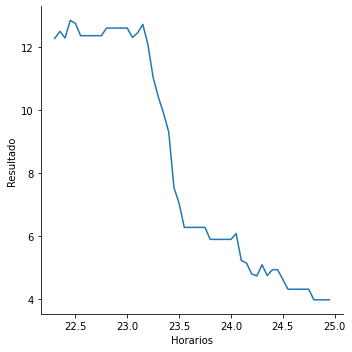

In [ ]:
import seaborn as sns

sns.relplot(data=data_pred, x="Horarios", y="Resultado", kind="line")

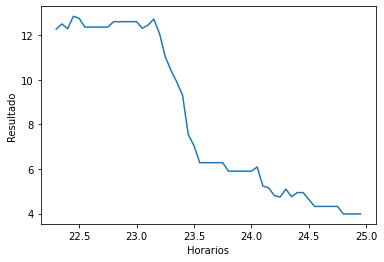

In [ ]:
sns.lineplot(data=data_pred, x="Horarios", y="Resultado", 
    markers=False, dashes=True)
